# Exploration of Grover's algorithm with Qiskit

## Project description
This Qiskit project implements Grover's quantum search algorithm, simplified to search for a single target state $|111>$ in a Hilbert space of $2^3$ dimension (000,001,010,011,100,101,110,111).

In [11]:
#Importing packages
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

In [13]:
# Number of qubits
n = 3
# Create a quantum register and a classical register
qr = QuantumRegister(n)
cr = ClassicalRegister(n)

In [14]:
# Create a quantum circuit
circuit = QuantumCircuit(qr, cr)
# Initialization: uniform superposition
circuit.h(qr)

In [15]:
# Oracle: mark target state |111>
circuit.mcx(control_qubits=[0, 1], target_qubit=2)

In [17]:
# Diffusion inversion around the mean
circuit.h(qr)
circuit.z(qr)
circuit.h(qr)
# Measurement
circuit.measure(qr, cr)
# Running on a simulator
simulator = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circuit, simulator)
result = simulator.run(transpiled_circuit).result()
counts = result.get_counts(circuit)

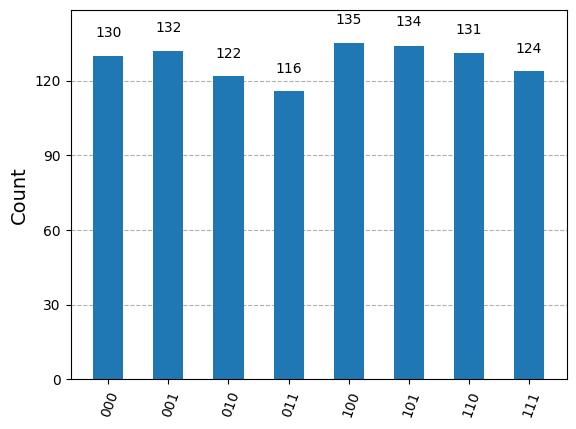

In [18]:
# Visualization of the results
plot_histogram(counts)

 # Conclusion
  
 In this project, we implement Grover's algorithm for finding the |111> state in a database of $2^3$ states (000,001,010,011,100,101,110,111). The histogram obtained after running the quantum circuit reveals a relatively uniform distribution of measurement results, although some slight variations are observed between different configurations. This distribution is in line with the original aim of Grover's algorithm, which is to amplify the probability of obtaining the marked |111> state while maintaining a certain superposition on the other states.